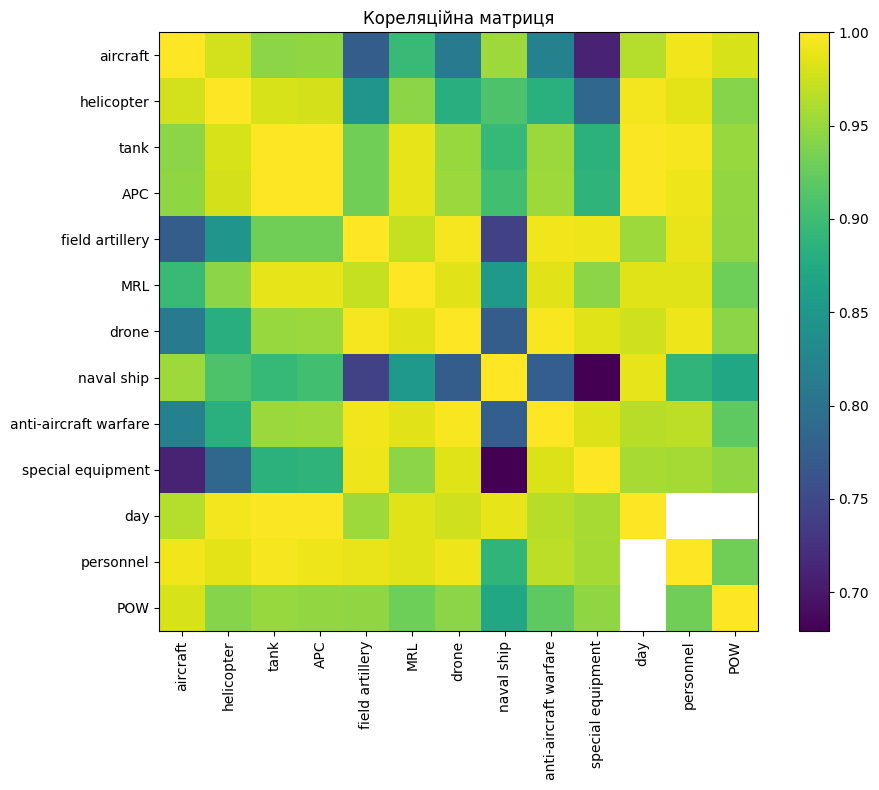

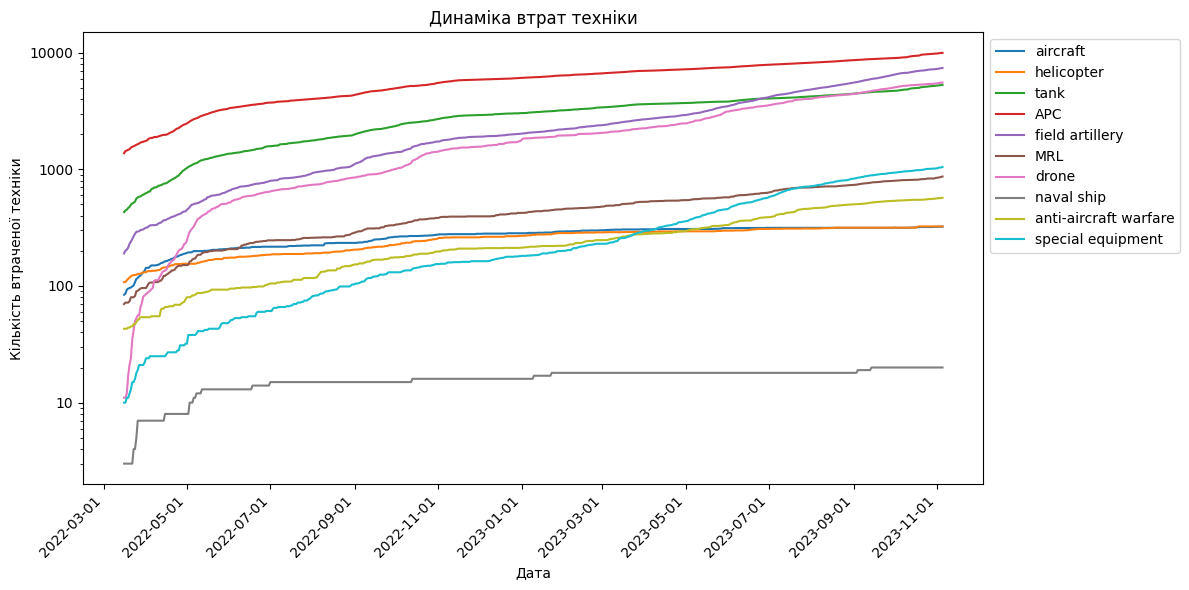

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter

equipment_df = pd.read_csv('russia_losses_equipment.csv')
corrections_df = pd.read_csv('russia_losses_equipment_correction.csv')
personnel_df = pd.read_csv('russia_losses_personnel.csv')

equipment_df = equipment_df[['date', 'aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL', 'drone', 'naval ship', 'anti-aircraft warfare', 'special equipment']]
corrections_df = corrections_df[['date', 'day']]
personnel_df = personnel_df[['date', 'personnel', 'personnel*', 'POW']]

equipment_df['date'] = pd.to_datetime(equipment_df['date'])
corrections_df['date'] = pd.to_datetime(corrections_df['date'])
personnel_df['date'] = pd.to_datetime(personnel_df['date'])

equipment_df = equipment_df.dropna().drop_duplicates()
corrections_df = corrections_df.dropna().drop_duplicates()
personnel_df = personnel_df.dropna().drop_duplicates()

merged_df = pd.merge(equipment_df, corrections_df, on='date', how='outer')
merged_df = pd.merge(merged_df, personnel_df, on='date', how='outer')

merged_df_numeric = merged_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = merged_df_numeric.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()

plt.title('Кореляційна матриця')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

for column in equipment_df.columns[1:]:
    plt.plot(equipment_df['date'], equipment_df[column], label=column)

plt.xlabel('Дата')
plt.ylabel('Кількість втраченої техніки')
plt.title('Динаміка втрат техніки')
plt.yscale('log')  

locator = AutoDateLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  

plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter())

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()
